# Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# About the dataset


In [2]:
#The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19
#converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset
#The corresponding column values represent the RGB values(0-255) of the corresponding(28*28) pixels

# Step 1. Data Preparation

In [3]:
df = pd.read_csv('train.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
df.shape

(42000, 785)

In [5]:
df=df.values
x=df[:,1:] #the pixel values are from the column 1
y=df[:,0] #the predicted values of given images lies in column 0

In [6]:
print(x.shape,y.shape)

(42000, 784) (42000,)


# Splitting the data

In [7]:
split = int(0.8*x.shape[0]) #split the given data into 80% training and 20% for testing
print(split)

#Assigning individual arrays for the training and testing datasets
x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


# Plotting Sample

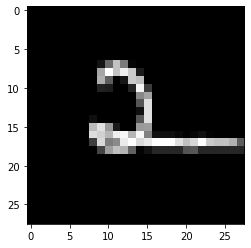

2


In [8]:
#plotting a random data sample
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray') #cmap=gray for better visualisation
    plt.show()
    
drawImg(x_train[55])
print(y_train[55])

# KNN Algorithm

In [9]:
#calculates the distance between two points
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [10]:
#function that predicts the querypoint classification
def knn(x,y,queryPoint,k=5):#considering 5 points for demonstration
    vals = [] #vals list contains the distances from all the points to query point and class to which it belongs respectively
    m = x.shape[0]#contains the number of points in the dataset
    for i in range(m):
        d = dist(queryPoint,x[i])#passing the query point and all the points for distance calculation
        vals.append((d,y[i]))#Y[i] indicates the class in which the point belongs to
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]#As the list is sorted, the first k-points are closest to the query point
    vals = np.array(vals)#converting to numpy array for easy calculation
    #print(vals)
    #np.unique returns the number of different classes, in our case only 2 classes->class 0 and class 1 are available
    #return_counts=true parameter returns the count of the unique values in the list
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)#new_vals[0] returns unique numbers list,new_vals[1] returns the count of unique number
    index = new_vals[1].argmax()#argmax returns the index of the class which has maximum unique count
    pred = new_vals[0][index]#returns the class of the querypoint
    return pred

# Testing the Data

In [11]:
pred = knn(x_train,y_train,x_test[1])
print(int(pred))

7


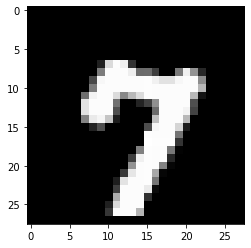

7


In [12]:
#Verifying the predicted value
drawImg(x_test[1])
print(y_test[1])

# Accuracy Check Function

In [13]:
def get_acc(x_tst,y_tst,x_train,y_train):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = knn(x_train,y_train,x_test[i])
        y_pred.append(p)  
    y_pred = np.array(y_pred)
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [ ]:
accuracy=get_acc(x_test,y_test,x_train,y_train)#takes a lot of time, be patient
print(accuracy)